In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### 获取每个元素的杨氏模量

In [4]:
elem_map = pd.read_excel("./Young's modulus.xlsx")
elem_map = {key: value for key, value in zip(elem_map['symbol'], elem_map['E(GPa)'])}

          number      E(GPa)
count  63.000000   63.000000
mean   50.015873  110.473016
std    23.534115  120.810301
min     3.000000    1.700000
25%    29.500000   36.950000
50%    51.000000   68.000000
75%    68.500000  129.000000
max    94.000000  528.000000


In [7]:
elem_map

{'Li': 4.9,
 'Be': 287.0,
 'Na': 10.0,
 'Mg': 45.0,
 'Al': 70.0,
 'Si': 47.0,
 'Ca': 20.0,
 'Sc': 74.4,
 'Ti': 116.0,
 'V': 128.0,
 'Cr': 279.0,
 'Mn': 198.0,
 'Fe': 211.0,
 'Co': 209.0,
 'Ni': 200.0,
 'Cu': 130.0,
 'Zn': 108.0,
 'As': 8.0,
 'Se': 10.0,
 'Rb': 2.4,
 'Y': 63.5,
 'Zr': 68.0,
 'Nb': 105.0,
 'Mo': 329.0,
 'Ru': 447.0,
 'Rh': 275.0,
 'Pd': 121.0,
 'Ag': 83.0,
 'Cd': 50.0,
 'In': 11.0,
 'Sn': 50.0,
 'Sb': 55.0,
 'Te': 43.0,
 'Cs': 1.7,
 'Ba': 13.0,
 'La': 36.6,
 'Ce': 33.6,
 'Pr': 37.3,
 'Nd': 41.4,
 'Pm': 46.0,
 'Sm': 49.7,
 'Eu': 18.2,
 'Gd': 54.8,
 'Tb': 55.7,
 'Dy': 61.4,
 'Ho': 64.8,
 'Er': 69.9,
 'Tm': 74.0,
 'Yb': 23.9,
 'Lu': 68.6,
 'Hf': 78.0,
 'Ta': 186.0,
 'W': 411.0,
 'Re': 463.0,
 'Ir': 528.0,
 'Pt': 168.0,
 'Au': 78.0,
 'TI': 8.0,
 'Pb': 16.0,
 'Bi': 32.0,
 'Th': 79.0,
 'U': 208.0,
 'Pu': 96.0}

### 读取数据

In [9]:
data_o = pd.read_excel("./first_process/data_processed.xlsx")
data_o

,Chemical compostion（at.%）,Critical Diameter/thickness(mm),Tg(K),Tx(K),Tl(K),σy(MPa),Modulus (GPa),Ε(%),Chemical compostion,Zr,...,Fe,Be,Hf,Ta,Y,Pd,Pt,P,Sc,V
0,Zr52.5Al10Ti5Cu17.9Ni14.6,7.0,670.0,723.0,1090.0,1654.0,86.0,0.06,Zr52.5Cu17.9Ni14.6Al10.0Ti5.0,52.50,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,Zr61Cu17.5Ni10Al7.5Si4,NaN,NaN,NaN,NaN,1800.0,NaN,NaN,Zr61.0Cu17.5Ni10.0Al7.5Si4.0,61.00,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,Zr57Nb5Cu15.4Ni12.6Al10,8.5,689.5,758.0,1115.0,1600.0,86.7,0.05,Zr57.0Cu15.4Ni12.6Al10.0Nb5.0,57.00,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,Zr57Cu18.67Ni8Al16.33,3.0,707.0,777.0,NaN,1326.0,NaN,1.10,Zr57.0Cu18.67Al16.33Ni8.0,57.00,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,Zr56.36Cu20.53Ni7.6Al15.51,3.0,708.0,779.0,NaN,1396.0,NaN,1.50,Zr56.36Cu20.53Al15.51Ni7.6,56.36,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Zr57.5Cu27.3Ni6.5Al8.7,14.0,651.0,755.0,1124.0,NaN,NaN,NaN,Zr57.5Cu27.3Al8.7Ni6.5,57.50,...,0.0,0.0,0.0,0,0,0,0,0,0,0
139,Zr51Ti5Cu25Ni10Al9,14.0,680.0,724.0,1002.0,NaN,NaN,NaN,Zr51.0Cu25.0Ni10.0Al9.0Ti5.0,51.00,...,0.0,0.0,0.0,0,0,0,0,0,0,0
140,Zr52.5Cu17.9Ni14.6Al10Ti5,3.0,653.0,723.0,NaN,1500.0,102.2,0.00,Zr52.5Cu17.9Ni14.6Al10.0Ti5.0,52.50,...,0.0,0.0,0.0,0,0,0,0,0,0,0
141,Zr55Cu30Al10Ni5,30.0,680.0,755.0,NaN,1504.0,NaN,2.20,Zr55.0Cu30.0Al10.0Ni5.0,55.00,...,0.0,0.0,0.0,0,0,0,0,0,0,0


### 预测

In [13]:
def calculate_weighted_composition(row, weights_map):
    E_pred = 0
    for column in row.index:
        if column in weights_map and row[column] != 0:
            concentration = row[column] / 100
            E_pred += weights_map[column] * concentration
    return E_pred

In [16]:
data_o['E_pred'] = data_o.apply(lambda x: calculate_weighted_composition(x, elem_map), axis=1)
data_o['yield_pred'] = (data_o['E_pred']/ 50 )* 1000

### 计算指标

In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
data_o_filtered_e = data_o.dropna(subset=['E_pred', 'Modulus (GPa)'])
data_o_filtered_yield = data_o.dropna(subset=['yield_pred', 'σy(MPa)'])

# R^2
r2_e_pred = r2_score(data_o_filtered_e['Modulus (GPa)'], data_o_filtered_e['E_pred'])
r2_yield_pred = r2_score(data_o_filtered_yield['σy(MPa)'], data_o_filtered_yield['yield_pred'])

# MSE
mse_e_pred = mean_absolute_error(data_o_filtered_e['Modulus (GPa)'], data_o_filtered_e['E_pred'])
mse_yield_pred = mean_absolute_error(data_o_filtered_yield['σy(MPa)'], data_o_filtered_yield['yield_pred'])
# MAPE
mape_e_pred = mean_absolute_percentage_error(data_o_filtered_e['Modulus (GPa)'], data_o_filtered_e['E_pred'])
mape_yield_pred = mean_absolute_percentage_error(data_o_filtered_yield['σy(MPa)'], data_o_filtered_yield['yield_pred'])

print('R^2 for E_pred:', r2_e_pred)
print('R^2 for yield_pred:', r2_yield_pred)

print('MAE for E_pred:', mse_e_pred)
print('MAE for yield_pred:', mse_yield_pred)

print('MAPE for E_pred:', mape_e_pred)
print('MAPE for yield_pred:', mape_yield_pred)

R^2 for E_pred: -0.20076192917189584
R^2 for yield_pred: -1.8602280755373815
MAE for E_pred: 38.83873125
MAE for yield_pred: 288.6546642857143
MAPE for E_pred: 20.531637759777848
MAPE for yield_pred: 19.998501224972177


### 绘制

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
data_o = pd.read_excel("./first_process/data_processed.xlsx")

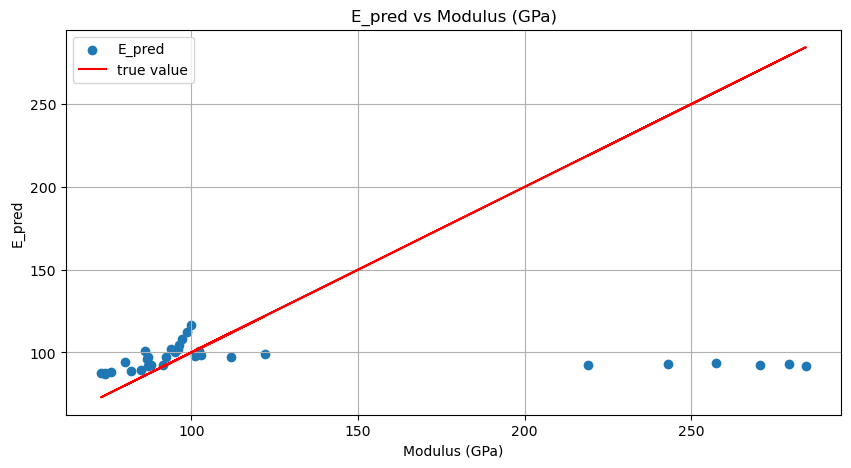

In [5]:
data_o_filtered_e = data_o.dropna(subset=['E_pred', 'Modulus (GPa)'])

plt.figure(figsize=(10, 5))
plt.scatter(data_o_filtered_e['Modulus (GPa)'], data_o_filtered_e['E_pred'], label='E_pred', marker='o')
plt.plot(data_o_filtered_e['Modulus (GPa)'], data_o_filtered_e['Modulus (GPa)'], label='true value', linestyle='-', color='red')
plt.xlabel('Modulus (GPa)')
plt.ylabel('E_pred')
plt.title('E_pred vs Modulus (GPa)')
plt.legend()
plt.grid()
plt.show()

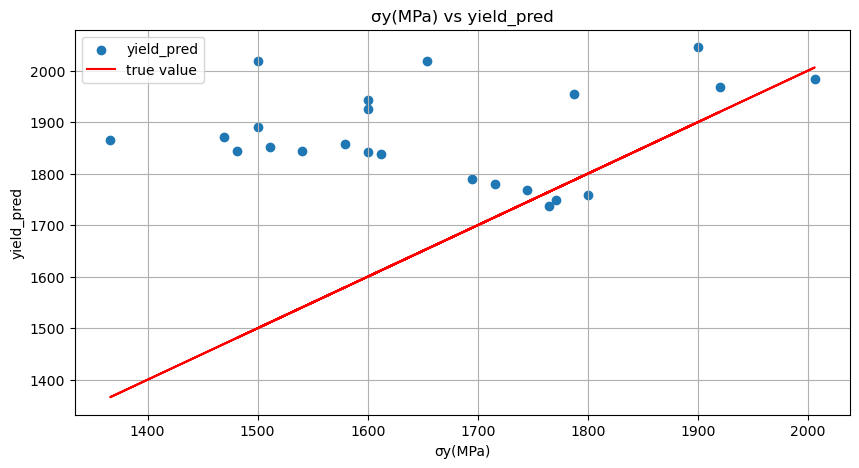

In [6]:
data_o_filtered_yield = data_o.dropna(subset=['yield_pred', 'σy(MPa)'])
plt.figure(figsize=(10, 5))
plt.scatter(data_o_filtered_e['σy(MPa)'], data_o_filtered_e['yield_pred'], label='yield_pred', marker='o')
plt.plot(data_o_filtered_e['σy(MPa)'], data_o_filtered_e['σy(MPa)'], label='true value', linestyle='-', color='red')
plt.xlabel('σy(MPa)')
plt.ylabel('yield_pred')
plt.title('σy(MPa) vs yield_pred')
plt.legend()
plt.grid()
plt.show()